# Step Size for Three Gradient Estimation Methods

We will compare the accuracy of the following methods for estimating a gradient:
- forward difference
- centeral difference
- complex step

In each case we compare their accuracy as a function of step size ($h$).  For simplicity we will use a 1D function.  We start with the forward and central differences.  Recall the formulas for forward and central difference.

$$\text{Forward Difference:}\quad f^\prime(x) \approx \frac{f(x + h) - f(x)}{h} $$

$$\text{Central Difference:}\quad f^\prime(x) \approx \frac{f(x + h) - f(x - h)}{2 h} $$

In [29]:
%matplotlib inline
import numpy as np
from math import sin, cos, exp
import matplotlib.pyplot as plt

# just a simple 1D function to illustarate
def f(x):
    return exp(x)*sin(x)

# these are the exact derivatives so we can compare performance
def g(x):
    return exp(x)*sin(x) + exp(x)*cos(x)

We now setup the step sizes we want to try and initialize our data.  Note that we use logarithmically spaced step sizes (e.g., 1e0, 1e-1, 1e-2, ...).  We also need to pick a point about which to take gradients.

In [30]:
# let's take a bunch of different step sizes from very large to very small
n = 26
step_size = np.logspace(0, -25, n)

# initialize results array (forward difference, central difference)
grad_fd = np.zeros(n)
grad_cd = np.zeros(n)

# arbitrarily chosen point
x = 0.5

Using a for loop we will now test out each of those step sizes.

In [31]:
# loop through and try all the different starting points
for i in range(n):
    h = step_size[i]
    grad_fd[i] = (f(x + h) - f(x))/h  
    grad_cd[i] = (f(x + h) - f(x-h))/(2*h)

We have an analytical solution for the gradient, so let's compute the relative error.

In [32]:
# compute relative error compared to the exact solution
grad_exact = g(x)
error_fd = np.abs((grad_fd - grad_exact)/grad_exact)
error_cd = np.abs((grad_cd - grad_exact)/grad_exact)

We now plot the results on a loglog scale.  The x-axis shows the different step sizes we tried and the y-axis the relative error as compared to the exact gradients.  Note that I've inverted the x-axis so that smaller step sizes are on the right.

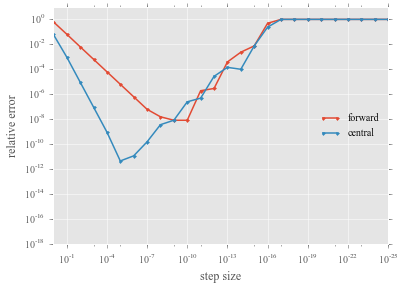

In [33]:
plt.style.use('ggplot')
plt.figure()
plt.loglog(step_size, error_fd, '.-', label='forward')
plt.loglog(step_size, error_cd, '.-', label='central')
plt.gca().set_ylim(ymin=1e-18, ymax=1e1)
ticks = np.arange(-1, -26, -3)
plt.xticks(10.0**ticks)
plt.gca().invert_xaxis()
plt.legend(loc='center right')
plt.xlabel('step size')
plt.ylabel('relative error')
plt.show()

Notice that there is large truncation error at large step sizes (starting from the left).  Then there is a downward decrease in error with a slope of 1 and 2 for forward and central respectively as expected (corresponding to error of $\mathcal{O}(h)$ and $\mathcal{O}(h^2)$).  If not for finite precision arithmetic these lines would continue indefinitely.  However, in a computer, subtractive cancellation starts becoming significant and the error starts increasing again.  At very small step sizes are error is 100% (the methods predict derivatives of 0).  Also note, as discussed, that the optimal step size for central diference is a bit larger than the optimal step size for forward difference.  For this function they are around $10^{-8}$ and $10^{-5}$.

Let's now try the same thing, but using the complex step method.  Almost everything can stay the same except that we need to import from cmath rather than math.  Doing this makes all of the functions we use (sin, cos, exp) defined for complex numbers and not just real numbers.  In Matlab, the functions are already overloaded for complex number automatically.  

The formula using the complex step method is:
$$\text{Complex Step:}\quad f^\prime(x) \approx \frac{\operatorname{Im}[f(x + ih)]}{h} $$

In [34]:
from cmath import sin, cos, exp

# initialize
grad_cs = np.zeros(n)

# loop through each step size
for i in range(n):
    h = step_size[i]
    grad_cs[i] = f(x + complex(0, h)).imag / h  
    

Same as before, we will compute the error then plot the result from all three methods.

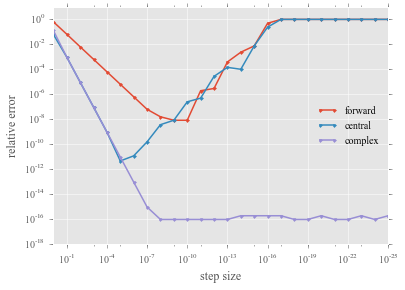

In [35]:
# compute error
error_cs = np.abs((grad_cs - grad_exact)/grad_exact)

# the error is below machine precision in some cases so just add epsilon error so it shows on plot
error_cs[error_cs == 0] = 1e-16

plt.figure()
plt.loglog(step_size, error_fd, '.-', label='forward')
plt.loglog(step_size, error_cd, '.-', label='central')
plt.loglog(step_size, error_cs, '.-', label='complex')
plt.gca().set_ylim(ymin=1e-18, ymax=1e1)
ticks = np.arange(-1, -26, -3)
plt.xticks(10.0**ticks)
plt.gca().invert_xaxis()
plt.legend(loc='center right')
plt.xlabel('step size')
plt.ylabel('relative error')
plt.show()

Notice that there is zero error (machine precision) for very small step sizes using the complex step method.  In other words we have numerically exact gradients without having to know anything about the actual function.